In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [2]:
df = pd.read_csv('./Brutus data/plummer_triples_L0_00_i1775_e90_Lw392.csv')

print(df.head())
print(df.columns)

   Timestep  Particle Number      Mass  X Position  Y Position  Z Position  \
0       0.0                1  0.333333    0.954551   -1.967417    0.464114   
1       0.0                2  0.333333   -0.217050    0.993279   -0.078712   
2       0.0                3  0.333333   -0.737501    0.974138   -0.385402   
3       0.5                1  0.333333    0.951443   -1.960886    0.462609   
4       0.5                2  0.333333   -0.331766    0.985411   -0.146491   

   X Velocity  Y Velocity  Z Velocity  Phase  
0    0.000000   -0.000000    0.000000      1  
1   -0.000000   -0.000000    0.000000      1  
2    0.000000    0.000000   -0.000000      1  
3   -0.012476    0.026152   -0.006044      1  
4   -0.568656   -0.035098   -0.335794      1  
Index(['Timestep', 'Particle Number', 'Mass', 'X Position', 'Y Position',
       'Z Position', 'X Velocity', 'Y Velocity', 'Z Velocity', 'Phase'],
      dtype='object')


14109
[2351. 2351. 2351. ... 4702. 4702. 4702.]


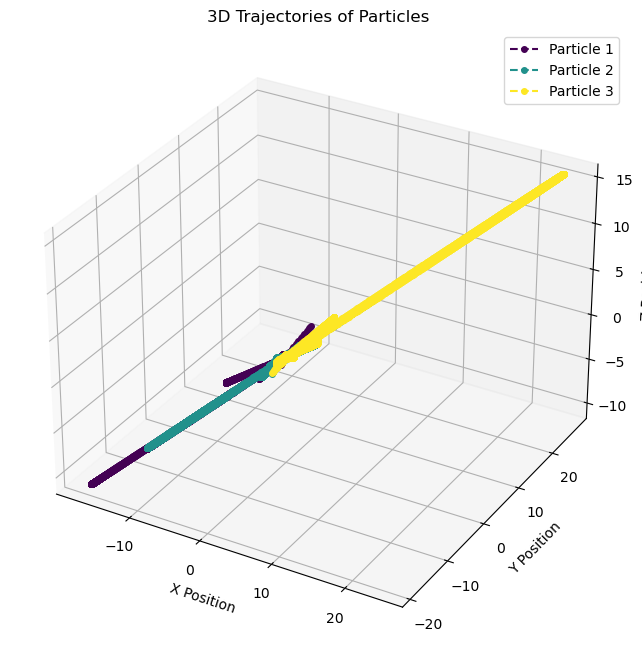

In [3]:
# Filter to include only the forward trajectory (Phase = 1)
forward_trajectory = df[df['Phase'] == -1]

# Extract timesteps, and positions (x, y, z)
timestep = forward_trajectory['Timestep'].values
print(len(timestep))
print(timestep)
x = forward_trajectory['X Position'].values
y = forward_trajectory['Y Position'].values
z = forward_trajectory['Z Position'].values

particles = forward_trajectory['Particle Number'].unique()


# Plot the evolution of the positions in time for the three particles
# In a single plot, show the trajectory followed by each particle with a scatter line

# Set up the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define a colormap to assign different colors for different particles
colors = plt.cm.viridis(np.linspace(0, 1, len(particles)))

# Loop through each particle and plot its trajectory
for idx, particle in enumerate(particles):
    # Filter data for this particular particle
    particle_data = forward_trajectory[forward_trajectory['Particle Number'] == particle]

    # Extract positions (x, y, z)
    x = particle_data['X Position'].values
    y = particle_data['Y Position'].values
    z = particle_data['Z Position'].values
    
    # Plot the trajectory 
    ax.plot(x, y, z, linestyle='--', marker='o', markersize=4, color=colors[idx], label=f'Particle {particle}')

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title('3D Trajectories of Particles')
ax.legend()

plt.show()

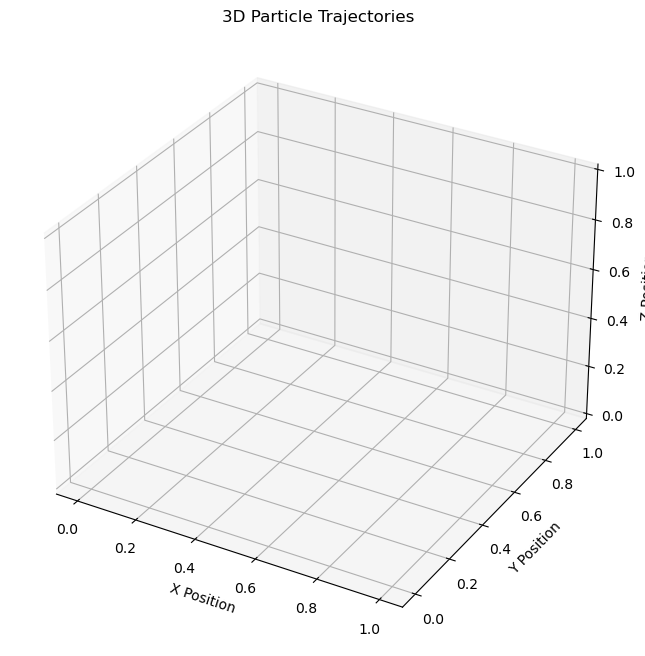

In [4]:
# Set up the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Set axis labels
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title('3D Particle Trajectories')

# Store line objects for animation
lines = {particle: ax.plot([], [], [], marker='o')[0] for particle in particles}

# Set the limits based on your data range or a predefined range
# Example: ax.set_xlim([-10, 10])
#          ax.set_ylim([-10, 10])
#          ax.set_zlim([-10, 10])

# Initialization function: plot the background of each frame
def init():
    for line in lines.values():
        line.set_data([], [])
        line.set_3d_properties([])
    return lines.values()

# Animation function
def update(frame):
    for particle in particles:
        # Filter data for this particular particle
        particle_data = forward_trajectory[forward_trajectory['Particle Number'] == particle]
        
        # Extract the positions up to the current frame
        x_positions = particle_data['X Position'].values
        y_positions = particle_data['Y Position'].values
        z_positions = particle_data['Z Position'].values
        
        if frame < len(x_positions):  # Ensure we don't go out of bounds
            # Update the line data for this particle
            lines[particle].set_data(x_positions[:frame+1], y_positions[:frame+1])
            lines[particle].set_3d_properties(z_positions[:frame+1])
    
    return lines.values()

# Get the number of frames from the maximum number of timesteps
num_frames = forward_trajectory['Timestep'].nunique()

# Create the animation
ani = FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True, repeat=False)

# Show the plot
plt.show()

For the 3d plot: https://jakevdp.github.io/blog/2013/02/16/animating-the-lorentz-system-in-3d/ 
for inspo

Total frames: 4703


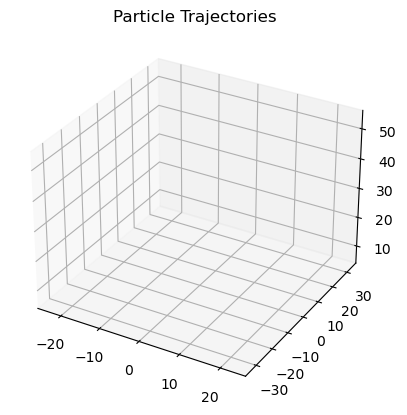

MovieWriter ffmpeg unavailable; using Pillow instead.


Animating frame 0
Animating frame 1
Animating frame 2
Animating frame 3
Animating frame 4
Animating frame 5
Animating frame 6
Animating frame 7
Animating frame 8
Animating frame 9
Animating frame 10
Animating frame 11
Animating frame 12
Animating frame 13
Animating frame 14
Animating frame 15
Animating frame 16
Animating frame 17
Animating frame 18
Animating frame 19
Animating frame 20
Animating frame 21
Animating frame 22
Animating frame 23
Animating frame 24
Animating frame 25
Animating frame 26
Animating frame 27
Animating frame 28
Animating frame 29
Animating frame 30
Animating frame 31
Animating frame 32
Animating frame 33
Animating frame 34
Animating frame 35
Animating frame 36
Animating frame 37
Animating frame 38
Animating frame 39
Animating frame 40
Animating frame 41
Animating frame 42
Animating frame 43
Animating frame 44
Animating frame 45
Animating frame 46
Animating frame 47
Animating frame 48
Animating frame 49
Animating frame 50
Animating frame 51
Animating frame 52
Ani

In [5]:
N_trajectories = len(particles)

# Prepare color mapping for trajectories
colors = plt.cm.jet(np.linspace(0, 1, N_trajectories))

# Set up figure & 3D axis for animation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-30, 30))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 10))
ax.set_title("Particle Trajectories")

# Set up lines and points for each trajectory
lines = [ax.plot([], [], [], '-', color=colors[i])[0] for i in range(N_trajectories)]
pts = [ax.plot([], [], [], 'o', color=colors[i])[0] for i in range(N_trajectories)]

# Initialization function: plot the background of each frame
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])
        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

# Animation function
def animate(i):
    print(f'Animating frame {i}')  # Debug print to check frame updates
    for j, particle in enumerate(particles):
        # Filter data for this particular particle
        particle_data = forward_trajectory[forward_trajectory['Particle Number'] == particle]
        
        # Get the positions for this particle
        x_positions = particle_data['X Position'].values
        y_positions = particle_data['Y Position'].values
        z_positions = particle_data['Z Position'].values
        
        # Check if the index is valid
        if i < len(x_positions):
            # Update the line data
            lines[j].set_data(x_positions[:i + 1], y_positions[:i + 1])
            lines[j].set_3d_properties(z_positions[:i + 1])
            
            # Update the point data for the last position
            pts[j].set_data(x_positions[i:i + 1], y_positions[i:i + 1])
            pts[j].set_3d_properties(z_positions[i:i + 1])

    return lines + pts

# Number of frames based on the maximum number of timesteps
num_frames = forward_trajectory['Timestep'].nunique()
print(f'Total frames: {num_frames}')  # Debug print for total frames

# Create the animation
anim = FuncAnimation(fig, animate, init_func=init, frames=num_frames, interval=30, blit=True)

# Show the plot
plt.show()

# Save the animation as a GIF file
anim.save('particle_trajectories.gif', fps=30)